# Redes Neurais Artificiais 2024.1

## Projeto Prático 2.1: Aprendizado Supervisionado no Neurônio Perceptrons

Equipe:
- Ademir Guimarães da Costa Junior - 2015080075
- Geovani Lopes Sampaio - 2015080033
- Gustavo Pacífico S. S. Chaves - 2015080013
- José Augusto de Almeida Neto - 2015080017

### Bibliotecas

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, f1_score, precision_score


from prettytable import PrettyTable

## Parte I – Resolvendo um Problema Linearmente Separável

In [44]:
def load_data(file_path):
    data = np.fromfile(file_path)

    num_linhas = len(data) // 3
    
    # Formatting into x1, x2, and yd
    splited_data = np.array(np.split(data, num_linhas))
    
    return splited_data

def step_function(net_input, theta=0.0):
    return 1 if net_input >= theta else 0

def perceptron(w, X, y, eta=0.1, max_epochs=None, shuffle_epoch=False):
    num_epochs = 0
    total_adjustments = 0
    converged = False

    while not converged: # treinar até a convergência
        num_epochs += 1
        adjustments = 0

        if shuffle_epoch:
            indices = np.arange(X.shape[0])
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

        for i in range(X.shape[0]):
            net_input = np.dot(X[i], w)
            prediction = step_function(net_input)
            error = y[i] - prediction
            
            if error != 0:
                w += eta * error * X[i] # função delta
                adjustments += 1
                total_adjustments += 1
        
        if adjustments == 0 or (max_epochs is not None and num_epochs >= max_epochs):
            converged = True

    return total_adjustments, num_epochs, w

def holdout_split(X, y, split_ratio=0.7):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * split_ratio)

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

def test_perceptron(w, X, y):
    correct_predictions = 0
    for i in range(X.shape[0]):
        net_input = np.dot(X[i], w)
        prediction = step_function(net_input)
        if prediction == y[i]:
            correct_predictions += 1
    accuracy = correct_predictions / len(y)
    return accuracy

def predict(X, w):
    predictions = []
    for i in range(X.shape[0]):
        net_input = np.dot(X[i], w)
        prediction = step_function(net_input)
        predictions.append(prediction)
    return np.array(predictions)

In [45]:
file_path = '../data/dataAll.txt'

formatted_data = load_data(file_path)

print("Unformatted data:", formatted_data.shape)
print("Sample of how the data is organized:\n", formatted_data[:5])

Unformatted data: (1000, 3)
Sample of how the data is organized:
 [[-363.7884  244.1423    0.    ]
 [ 328.7572 -256.7658    1.    ]
 [-164.9827  613.2164    0.    ]
 [ 536.5905  764.9575    0.    ]
 [ 314.2297  343.8375    0.    ]]


In [46]:
X = formatted_data[:, :2]  # atributos x1 e x2
y = formatted_data[:, 2]   # rótulo yd

# Taxa de aprendizado
eta = 0.1

# Vetor de pesos
np.random.seed(42)
w = np.random.uniform(-0.5, 0.5, 3)  # Três pesos, incluindo o bias

print("Vetor inicial de pesos:", w)

Vetor inicial de pesos: [-0.12545988  0.45071431  0.23199394]


In [47]:
# Adicionar um termo de bias aos dados de entrada (coluna de 1)
X = np.hstack((np.ones((X.shape[0], 1)), X))

total_adjustments, num_epochs, final_weights = perceptron(w, X, y, eta)

In [48]:
print("Número total de ajustes no vetor de pesos:", total_adjustments)
print("Número de épocas até a convergência:", num_epochs)
print("Vetor final de pesos:", final_weights)

Número total de ajustes no vetor de pesos: 58
Número de épocas até a convergência: 3
Vetor final de pesos: [  -0.72545988  337.39380431 -337.21050606]


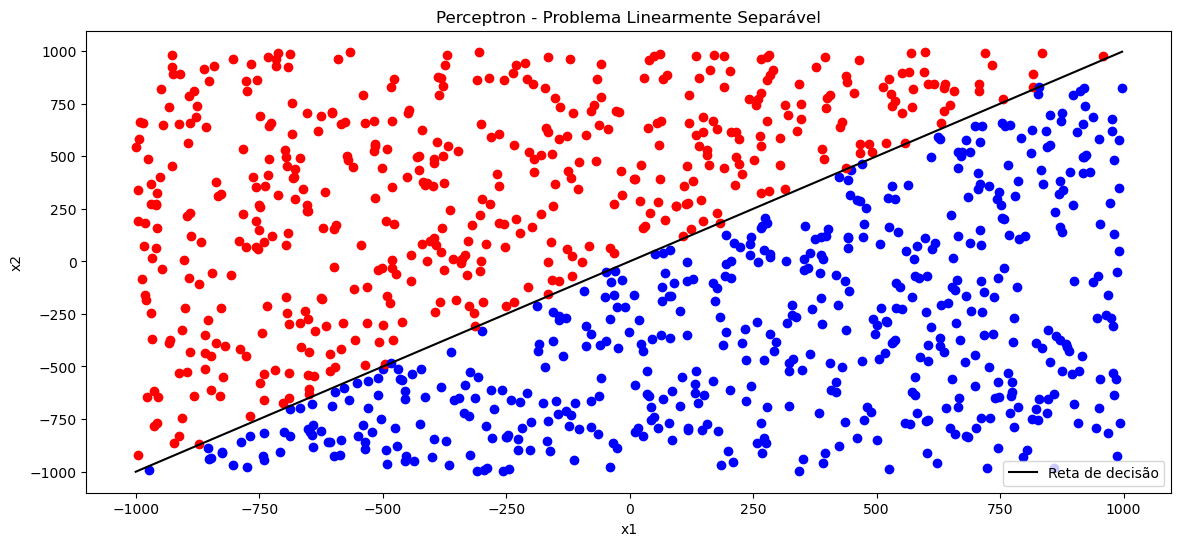

In [49]:
# Plotar os dados e a reta de decisão
plt.figure(figsize=(14, 6))
for i in range(X.shape[0]):
    if y[i] == 0:
        plt.scatter(X[i, 1], X[i, 2], color='red')
    else:
        plt.scatter(X[i, 1], X[i, 2], color='blue')

# Plotar a reta de separação
x_values = [min(X[:, 1]), max(X[:, 1])]
y_values = - (w[1] * np.array(x_values) + w[0]) / w[2]
plt.plot(x_values, y_values, label='Reta de decisão', color='black')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Perceptron - Problema Linearmente Separável')
plt.legend()
plt.show()

## Parte II – Experimentação

In [50]:
identificador = (5 + 3 + 3 + 7) % 4
file_path = f'../data/data{identificador}.txt'

formatted_data = load_data(file_path)

print("Unformatted data:", formatted_data.shape)
print("Sample of how the data is organized:\n", formatted_data)

Unformatted data: (600, 3)
Sample of how the data is organized:
 [[ 0.00553719 -0.02079496  1.        ]
 [ 0.12017245 -0.04795293  1.        ]
 [ 0.14868002 -0.0176822   1.        ]
 ...
 [ 0.86366064  0.90211893  0.        ]
 [ 1.10699273  0.94266602  0.        ]
 [ 0.99828858  0.99300766  0.        ]]


In [51]:
X = formatted_data[:, :2]  # atributos x1 e x2
y = formatted_data[:, 2]   # rótulo yd

# Adicionar um termo de bias aos dados de entrada (coluna de uns)
X = np.hstack((np.ones((X.shape[0], 1)), X))

print("Amostra de como os dados estão organizados:\n", X[:5])

Amostra de como os dados estão organizados:
 [[ 1.          0.00553719 -0.02079496]
 [ 1.          0.12017245 -0.04795293]
 [ 1.          0.14868002 -0.0176822 ]
 [ 1.          0.00719062 -0.08786827]
 [ 1.          0.17842545  0.04457275]]


In [52]:
eta_values = [0.4, 0.1, 0.01]
intervals = [(-100, 100), (-0.5, 0.5)]

+------+--------------------+---------------+-----------------------+------------------------+
| Eta  | Intervalo de Pesos | Média Ajustes | Desvio Padrão Ajustes | Menor Número de Épocas |
+------+--------------------+---------------+-----------------------+------------------------+
| 0.4  |    (-100, 100)     |     300.7     |   223.93528082908242  |           8            |
| 0.4  |    (-0.5, 0.5)     |      11.9     |   3.645545226711637   |           5            |
| 0.1  |    (-100, 100)     |     1798.9    |   692.0207294583017   |           16           |
| 0.1  |    (-0.5, 0.5)     |      18.9     |   6.640030120413611   |           3            |
| 0.01 |    (-100, 100)     |    13692.6    |   8662.328349814501   |           74           |
| 0.01 |    (-0.5, 0.5)     |      82.6     |   41.47095369050487   |           3            |
+------+--------------------+---------------+-----------------------+------------------------+


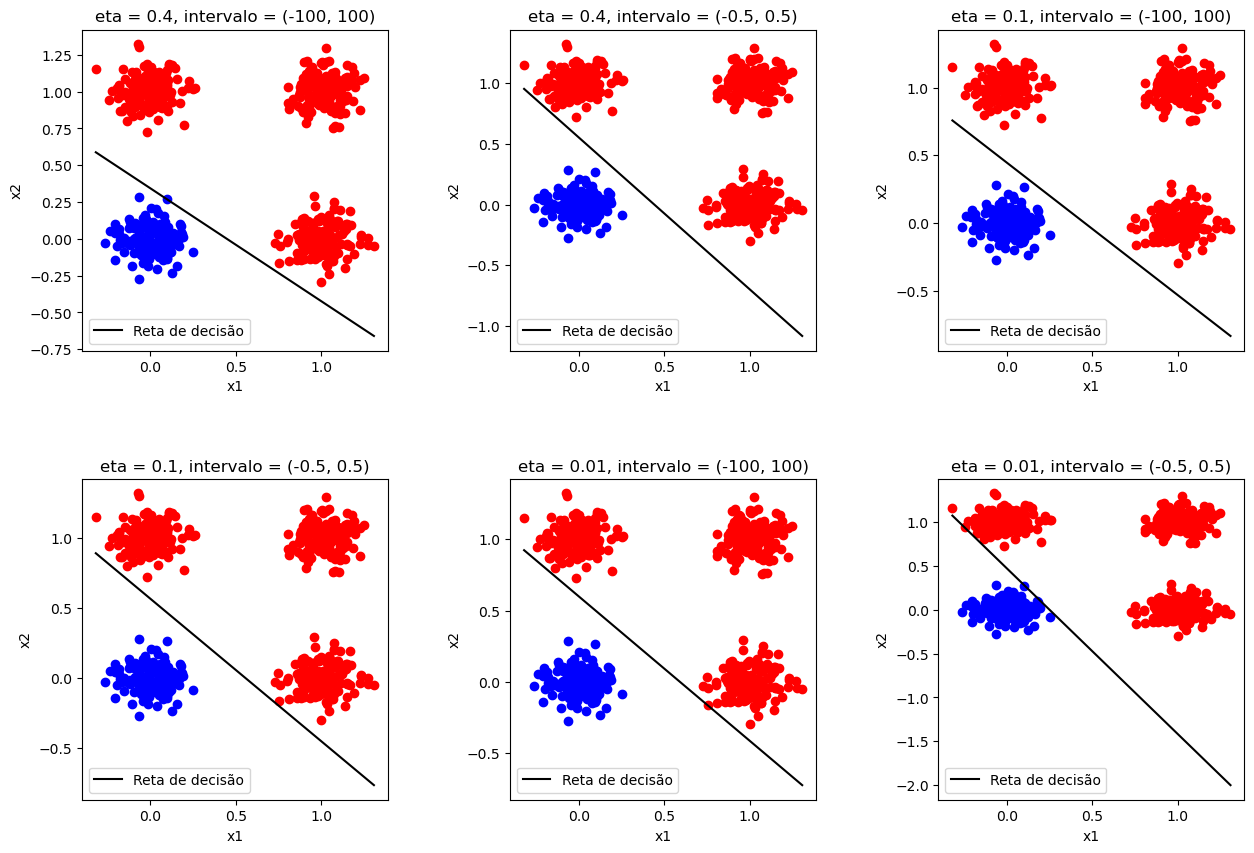

In [53]:
# Criação da tabela para os resultados
table = PrettyTable()
table.field_names = ["Eta", "Intervalo de Pesos", "Média Ajustes", "Desvio Padrão Ajustes", "Menor Número de Épocas"]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plot_idx = 0

for eta in eta_values:
    for interval in intervals:
        adjustments_list = []
        epochs_list = []

        for _ in range(10):
            # Gerar um novo vetor de pesos inicial aleatório dentro do intervalo especificado
            w = np.random.uniform(interval[0], interval[1], 3)

            total_adjustments, num_epochs, final_weights = perceptron(w, X, y, eta)
            adjustments_list.append(total_adjustments)
            epochs_list.append(num_epochs)

        # Calcula a média e o desvio padrão dos ajustes
        mean_adjustments = np.mean(adjustments_list)
        std_adjustments = np.std(adjustments_list)
        min_epochs = np.min(epochs_list)

        table.add_row([eta, interval, mean_adjustments, std_adjustments, min_epochs])

        # Plotar os dados e a reta de decisão para a última execução
        ax = axes[plot_idx // 3, plot_idx % 3]
        for i in range(X.shape[0]):
            if y[i] == 0:
                ax.scatter(X[i, 1], X[i, 2], color='red')
            else:
                ax.scatter(X[i, 1], X[i, 2], color='blue')

        x_values = [min(X[:, 1]), max(X[:, 1])]
        y_values = - (final_weights[1] * np.array(x_values) + final_weights[0]) / final_weights[2]
        ax.plot(x_values, y_values, label='Reta de decisão', color='black')

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_title(f'eta = {eta}, intervalo = {interval}')
        ax.legend()
        plot_idx += 1

print(table)
plt.show()

## Parte III – Validação Holdout em Problema Não-Linearmente Separável

In [54]:
file_path = f'../data/dataHoldout.txt'

formatted_data = load_data(file_path)

print("Unformatted data:", formatted_data.shape)
print("Sample of how the data is organized:\n", formatted_data)

Unformatted data: (800, 3)
Sample of how the data is organized:
 [[-0.29322959 -0.09065359  1.        ]
 [ 0.07988839  0.21101297  1.        ]
 [-0.07825563 -0.08083512  1.        ]
 ...
 [ 0.65980493  1.05876739  0.        ]
 [ 1.09867123  0.87404891  0.        ]
 [ 0.72930655  0.93224271  0.        ]]


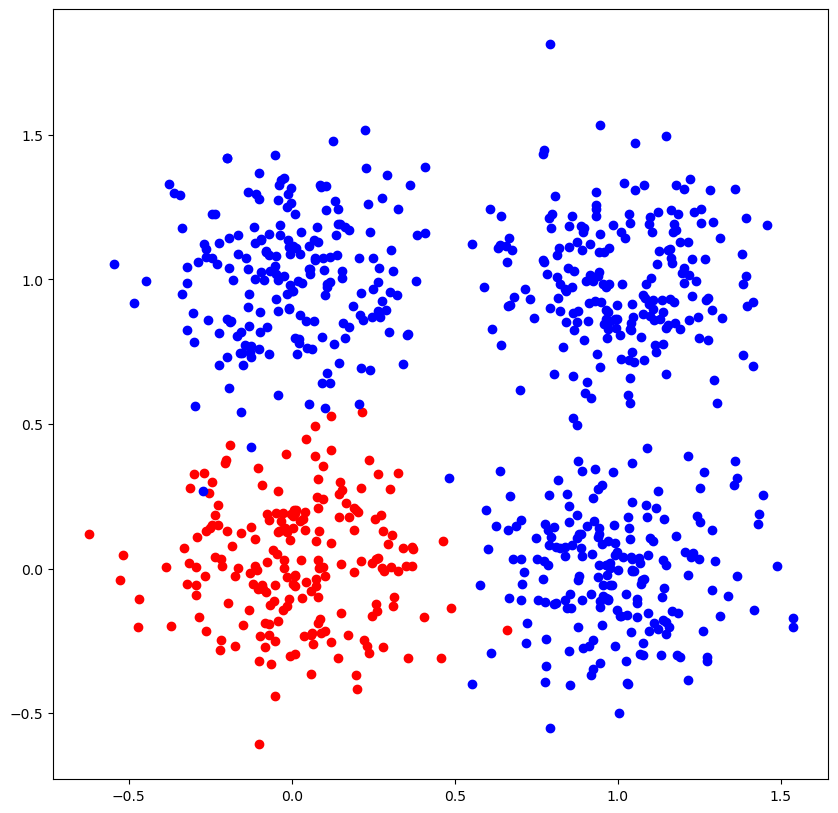

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))

for i in range(len(formatted_data)):
  x_plot = formatted_data[i][0]
  if formatted_data[i][2] < 1:
    y_blue = formatted_data[i][1]
    plt.scatter(x_plot,y_blue, c='blue')
  else:
    y_red = formatted_data[i][1]
    plt.scatter(x_plot, y_red, c='red')


plt.show()

#Com esse gráfico é possível observar que o problema não é linearmente separável

In [56]:
X = formatted_data[:, :2]  # atributos x1 e x2
y = formatted_data[:, 2]   # rótulo yd

# Adicionar um termo de bias aos dados de entrada (coluna de uns)
X = np.hstack((np.ones((X.shape[0], 1)), X))

print("Amostra de como os dados estão organizados:\n", X[:5])

Amostra de como os dados estão organizados:
 [[ 1.         -0.29322959 -0.09065359]
 [ 1.          0.07988839  0.21101297]
 [ 1.         -0.07825563 -0.08083512]
 [ 1.         -0.46833414 -0.10620722]
 [ 1.          0.46304142  0.09405471]]


In [57]:
X_train, X_test, y_train, y_test = holdout_split(X, y)

print("Tamanho do conjunto de treinamento:", len(X_train))
print("Tamanho do conjunto de teste:", len(X_test))

Tamanho do conjunto de treinamento: 560
Tamanho do conjunto de teste: 240


In [58]:
w = np.random.uniform(-0.5, 0.5, 3)
total_adjustments, num_epochs, final_weights = perceptron(w, X_train, y_train, max_epochs=100, shuffle_epoch=True)

final_weights

array([ 0.21220307, -0.36112262, -0.40651843])

In [59]:
# Fazer previsões para o conjunto de testes
y_pred = predict(X_test, final_weights)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir a matriz de confusão
print("Matriz de Confusão:")
print(conf_matrix)

Matriz de Confusão:
[[164   5]
 [  5  66]]


In [60]:
# Avaliar o modelo usando o conjunto de teste
accuracy = test_perceptron(final_weights, X_train, y_train)
print("Acurácia do perceptron no conjunto de treinamento:",accuracy)

Acurácia do perceptron no conjunto de treinamento: 0.9553571428571429


In [61]:
y_pred = predict(X_train, final_weights)

precisao = precision_score(y_train, y_pred)

# Calculando revocação
revocacao = recall_score(y_train, y_pred)

# Calculando F-Score (com beta=1 para F1-Score)
f_score = f1_score(y_train, y_pred)

print(f'Precisão: {precisao}')
print(f'Revocação: {revocacao}')
print(f'F-Score: {f_score}')

Precisão: 0.8466666666666667
Revocação: 0.9844961240310077
F-Score: 0.910394265232975


#Com esse gráfico é possível observar que o problema não é linearmente separável

### Questões

Matriz de confusão das previsões efetuadas para o conjunto de testes;

Qual a acurácia da solução proposta para os dados do conjunto de treinamento inicialmente
fornecido?

Nos mesmos termos da questão anterior, obtenha os valores de precisão, revocação e F-Score.
Para estes cálculos, está liberada a utilização de sklearn.metrics;

A partir destas métricas, discorra acerca da qualidade desta solução perante o conjunto de
testes.

Gráficos com a solução obtida pelo neurônio Perceptron, dados de treinamento e dados de teste.